# Decision Trees and Random Forests: Application on feature data for A549 cell line in GREG.

Shaurya Jauhari (Email: shauryajauhari@gzhmu.edu.cn)

## Contents

* [1. Decision Trees](#link1)
    * [1.1 Package Installation and Loading Libraries](#link2)
    * [1.2 Dataset Handling](#link3)
    * [1.3 Deploying Tree Models](#link4)
        * [1.3.1 'party' Package](#link5)
            * [1.3.1.1 SMOTE Transformation](#link6)


##  <a id=link1>1. Decision Trees </a>

### <a id=link2>1.1 Package Installation and Loading Libraries </a>

In [3]:
install.packages("party", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
install.packages("rpart", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
install.packages("rpart.plot", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
library(party)
library(rpart)
library(rpart.plot)

Installing package into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



### <a id=link3>1.2 Dataset Handling </a>

In [4]:
a549greg <- read.table("A549forML.txt", header = TRUE) ## loading data
a549greg <- a549greg[, -c(1:3)] ## removing the first three columns for non-usage in the ML model.

In [3]:
head(a549greg)

,CTCF,EP300,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K9ac,H3K9me3,RAD21,RNAPol2,YY1,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
2,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
3,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
4,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
5,0,0,0.00000000,0.00000000,0.00000,0,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0.00000000,Non-Hub
6,0,0,0.02727825,0.02613314,1.58534,0,0.03331304,1.537907,0.02891425,0.1631014,0.06050439,0.05796767,Non-Hub


In [6]:
rownames(a549greg) <- c()
a549greg$Class <- as.numeric(as.factor(a549greg$Class))-1
head(a549greg$Class)

[1] 1 1 1 1 1 1

### <a id=link4>1.3 Deploying Tree Models </a>

#### <a id=link5>1.3.1 'party' Package </a>

Let us now partition the data into training and testing subsets, as per the Pareto's dogma, i.e. maintaining 80:20 ratio for train and testing cases.

In [5]:
set.seed(3)
dataPartition <- sample(2, nrow(a549greg), replace = TRUE, prob = c(0.8,0.2))
train <- a549greg[dataPartition==1,]
test <- a549greg[dataPartition==2,]

In [9]:
cat("We have",nrow(train),"training examples and",nrow(test),"for testing.")

We have 1237967 training examples and 310325 for testing.

In [10]:
a549Tree <- ctree(Class ~ ., data= train)
print(a549Tree)


	 Conditional inference tree with 12 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  1237967 

1) H3K4me1 <= 3.040734; criterion = 1, statistic = 180.413
  2) H3K36me3 <= 0.6794617; criterion = 1, statistic = 91.741
    3) CTCF <= 0.6574166; criterion = 1, statistic = 56.848
      4) CTCF <= 0; criterion = 1, statistic = 49.574
        5)*  weights = 135524 
      4) CTCF > 0
        6) H3K9me3 <= 1.445713; criterion = 0.999, statistic = 16.424
          7)*  weights = 474849 
        6) H3K9me3 > 1.445713
          8) H3K27me3 <= 4.037181; criterion = 0.998, statistic = 14.026
            9)*  weights = 71624 
          8) H3K27me3 > 4.037181
            10)*  weights = 1303 
    3) CTCF > 0.6574166
      11) H3K36me3 <= 0; criterion = 0.968, statistic = 9.012
        12)*  weights = 62293 
      11) H3K36me3 > 0
        13)*  weights = 59157 
  2) H3K36me3 > 0.679461

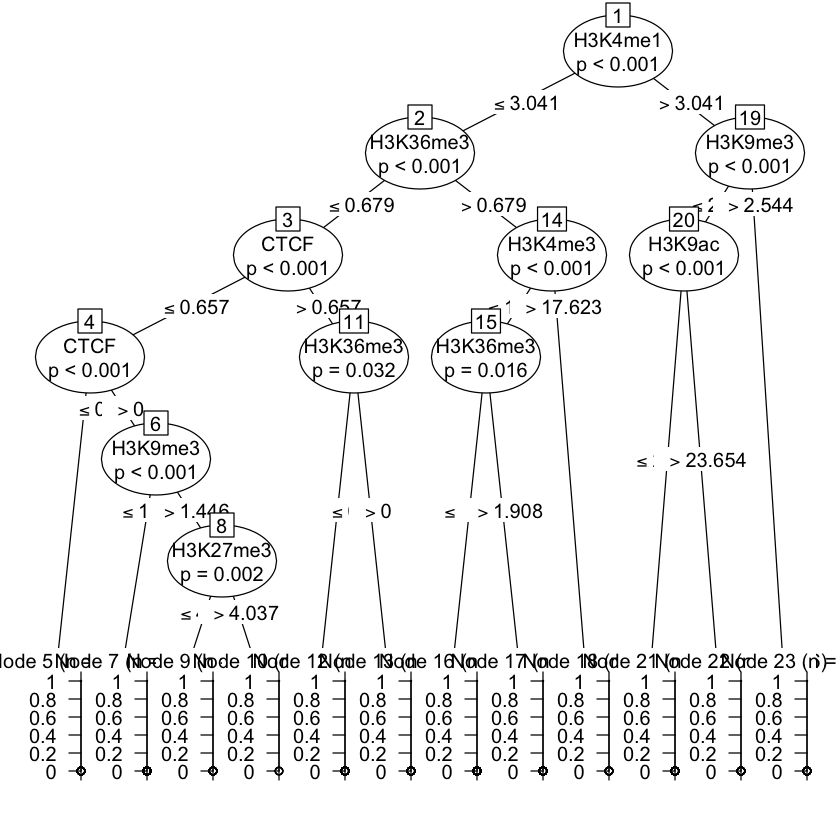

In [11]:
plot(a549Tree)

The summary says that the tree has 23 overall nodes.

In [13]:
treePred <- predict(a549Tree,test)
head(ifelse(treePred > 0.5, "Non-Hub", "Hub"))
treePred <- ifelse(treePred > 0.5, "1", "0")

Class
Non-Hub
Non-Hub
Non-Hub
Non-Hub
Non-Hub
Non-Hub


In [14]:
treePredProb <- predict(a549Tree,test, type="prob")
head(treePredProb)

[[1]]
[1] 0.9997639

[[2]]
[1] 0.9928174

[[3]]
[1] 0.9997639

[[4]]
[1] 0.9997639

[[5]]
[1] 0.9997639

[[6]]
[1] 0.9997639

In [15]:
# Misclassification Error

tab <- table(treePred, test$Class)
print(tab)

        
treePred      0      1
       1    379 309946


It can be articulated that the high skewness in data towards "Non-Hubs" outnumbering "Hubs" has engenedered a high-probability of classification for the former and "Hubs" haven't been predicted at all. 

Let us examine if the bifurcation of data into 7:3 ratio of training and testing sets makes any difference in the structure of the classification tree here.

In [18]:
set.seed(03)
dataPartition73 <- sample(2, nrow(a549greg), replace = TRUE, prob = c(0.7,0.3))
train73 <- a549greg[dataPartition73==1,]
test73 <- a549greg[dataPartition73==2,]

In [19]:
cat("We have",nrow(train73),"training examples and",nrow(test73),"for testing.")

We have 1083457 training examples and 464835 for testing.

In [20]:
a549Tree73 <- ctree(Class ~ ., data= train73)
print(a549Tree73)


	 Conditional inference tree with 15 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  1083457 

1) H3K4me1 <= 3.040734; criterion = 1, statistic = 140.393
  2) H3K36me3 <= 0.6794617; criterion = 1, statistic = 81.023
    3) CTCF <= 0.6574166; criterion = 1, statistic = 50.685
      4) CTCF <= 0; criterion = 1, statistic = 44.23
        5)*  weights = 118568 
      4) CTCF > 0
        6) H3K9me3 <= 1.445713; criterion = 0.999, statistic = 14.983
          7)*  weights = 415692 
        6) H3K9me3 > 1.445713
          8) H3K27me3 <= 4.20085; criterion = 0.998, statistic = 13.771
            9)*  weights = 62791 
          8) H3K27me3 > 4.20085
            10)*  weights = 970 
    3) CTCF > 0.6574166
      11)*  weights = 106273 
  2) H3K36me3 > 0.6794617
    12) H3K36me3 <= 1.907719; criterion = 0.991, statistic = 11.352
      13) YY1 <= 0.7535798; criterion = 0.952, stat

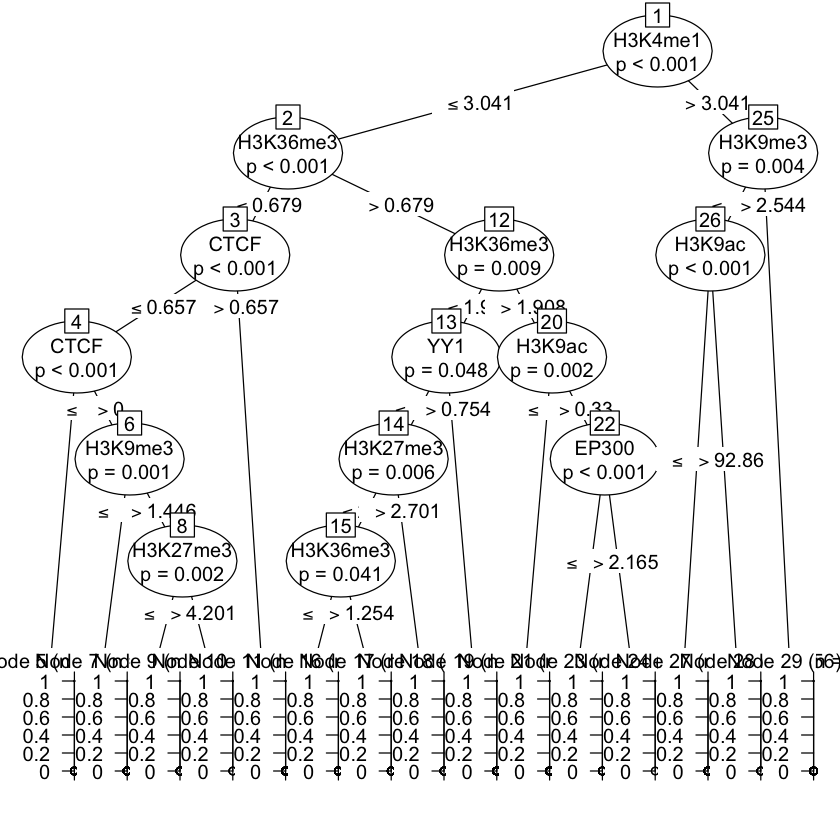

In [21]:
plot(a549Tree73)

In [30]:
treePred73 <- predict(a549Tree73, test73, type="response")
treePred73 <- ifelse(treePred73 > 0.5, "1", "0")

In [31]:
tab73 <- table(treePred73, test73$Class)
print(tab73)

          
treePred73      0      1
         1    582 464253


No luck here too. The data is highly biased, even for the modified data split. Let's resort to SMOTE transformation.

##### <a id=link6>1.3.1.1 SMOTE Transformation </a>

SMOTE transformation of the data has engendered fair model performance, in the case of logistic regression. See the pipeline [here](https://nbviewer.jupyter.org/github/shauryajauhari/transcriptionFactoriesGREG/blob/master/MachineLearning/LogisticRegressionA549GREG.ipynb).

In [7]:
install.packages("DMwR")
library(DMwR)

In [9]:
train$Class <- as.factor(train$Class)
smoteData <- SMOTE(Class ~., train, perc.over = 10000, k = 5, perc.under = 100)
table(smoteData$Class)


    Hub Non-Hub 
 158469  156900 

Now that the data is seemingly balanced, let's examine the performance of the model.

In [10]:
a549SmoteTree <- ctree(Class ~ ., data= smoteData)
print(a549SmoteTree)


	 Conditional inference tree with 3178 terminal nodes

Response:  Class 
Inputs:  CTCF, EP300, H3K27me3, H3K36me3, H3K4me1, H3K4me2, H3K4me3, H3K9ac, H3K9me3, RAD21, RNAPol2, YY1 
Number of observations:  315369 

1) H3K36me3 <= 0.6794617; criterion = 1, statistic = 6197.117
  2) CTCF <= 0; criterion = 1, statistic = 1535.813
    3) H3K4me1 <= 0.1815042; criterion = 1, statistic = 74.359
      4) H3K36me3 <= 0; criterion = 1, statistic = 82.923
        5) RAD21 <= 0.02718356; criterion = 1, statistic = 77.753
          6) EP300 <= 0; criterion = 1, statistic = 61.151
            7) H3K4me1 <= 0; criterion = 1, statistic = 19.252
              8)*  weights = 15865 
            7) H3K4me1 > 0
              9)*  weights = 204 
          6) EP300 > 0
            10) EP300 <= 0.02658568; criterion = 1, statistic = 140.272
              11)*  weights = 171 
            10) EP300 > 0.02658568
              12) YY1 <= 0.008183445; criterion = 1, statistic = 33.379
                13) H3K27me3

This is a relatively larger tree with 6355 nodes. Apparently, the stablization of the class distribution in the data has made the tree more comprehensive. 

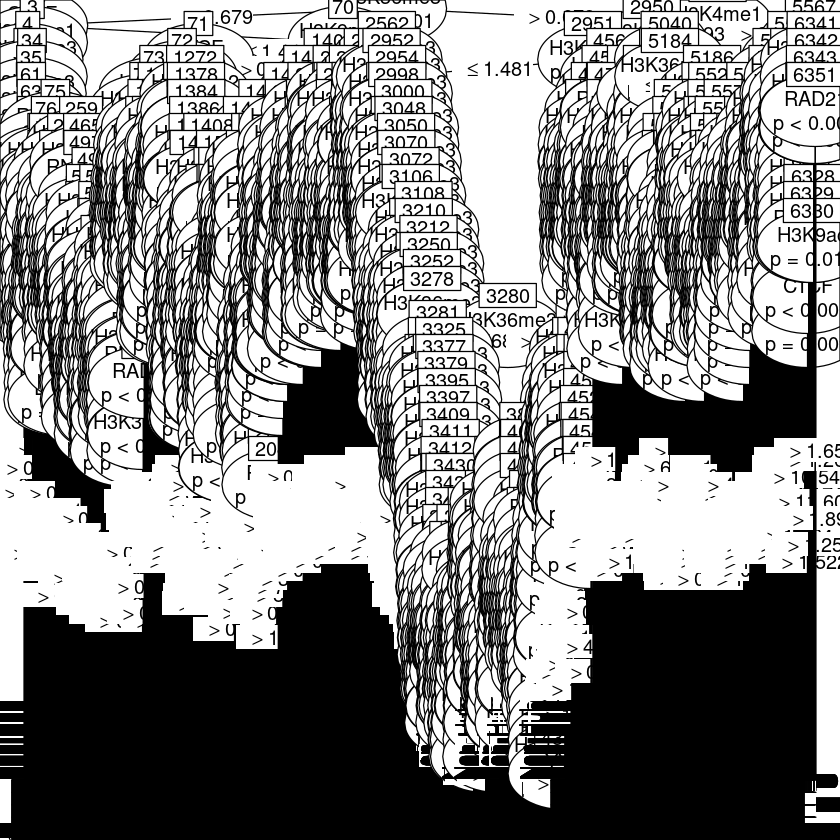

In [11]:
plot(a549SmoteTree)

Obviously, it is hard to interpret the graphic above.

In [17]:
treeSmotePred <- predict(a549SmoteTree, test)
head(treeSmotePred)

[1] Non-Hub Non-Hub Non-Hub Non-Hub Non-Hub Non-Hub
Levels: Hub Non-Hub

In [18]:
tabSmote <- table(treeSmotePred, as.factor(test$Class))
print(tabSmote)

             
treeSmotePred    Hub Non-Hub
      Hub        156   50191
      Non-Hub    223  259755


We can see distinct class indulgences, as opposed to the above cases of just "Non-Hub" instances.

In [21]:
install.packages(c('caret', 'e1071'))

library(caret)
library(e1071)
cat("The sensitivity of the model is", (sensitivity(tabSmote))*100, "%")

Installing packages into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gower’, ‘lubridate’, ‘timeDate’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: ggplot2



The sensitivity of the model is 41.16095 %

In [22]:
cat("The specificity of the model is", (specificity(tabSmote))*100, "%")

The specificity of the model is 83.80653 %

#### Exercise
- Addtionally, the function ctree() offers flexibility in terms of defining parameters for classification via ctree_control() function. Look for attributes *mincriterion* and *minsplit*. The former denotes the confidence level (i.e. 1- probability value), while the latter signifies the minimum number of samples required for splitting a tree branch into two. The default values are 0.95 and 20 respectively. See if any alteration makes a difference.
- They can be accessed via *controls*, i.e. ctree(formula,data,controls=ctree_control(mincriterion= , minsplit= ).
- You may explore other attributes too.

In [10]:
tree_pred <- predict(ep_tree,test)
head(ifelse(tree_pred>0.5, "Non-Enhancer", "Enhancer"))
tree_pred <- ifelse(tree_pred>0.5, "1", "0")

class
Non-Enhancer
Non-Enhancer
Non-Enhancer
Non-Enhancer
Non-Enhancer
Non-Enhancer


In [11]:
tree_pred_prob <- predict(ep_tree,test, type="prob")
head(tree_pred_prob)

[[1]]
[1] 0.8760172

[[2]]
[1] 0.8760172

[[3]]
[1] 0.8760172

[[4]]
[1] 0.8760172

[[5]]
[1] 0.5769971

[[6]]
[1] 0.8760172

#### Misclassification Error

In [12]:
tab <- table(tree_pred, test$class)
print(tab)

         
tree_pred      0      1
        0   5857   5822
        1  73562 142074


In [13]:
accur <- 1 - sum(diag(tab))/sum(tab)
cat("The accuracy of the model is",accur*100,"%")
#print("\n")
ifelse(accur>90, print("Not bad."), print("Poor."))

The accuracy of the model is 34.92246 %[1] "Poor."


[1] "Poor."

#### Exercise
- What do you think the misclassification error will be like if the table is drawn for *train* data?

In [14]:
tree_pred1 <- predict(ep_tree,train)
head(ifelse(tree_pred1>0.5, "Non-Enhancer", "Enhancer"))
tree_pred1 <- ifelse(tree_pred1 > 0.5, "1", "0")

# training data

tab1 <- table(tree_pred1, train$class)
print(tab1)

accur <- 1 - sum(diag(tab1))/sum(tab1)
cat("The accuracy of the model is",accur*100,"%")

ifelse(accur>90, print("Not bad."), print("Poor."))

class
Non-Enhancer
Non-Enhancer
Non-Enhancer
Non-Enhancer
Non-Enhancer
Non-Enhancer


          
tree_pred1      0      1
         0  23471  22710
         1 292063 569667
The accuracy of the model is 34.67003 %[1] "Poor."


[1] "Poor."

#### 'rpart' package

In [15]:
ep_tree1 <- rpart(class ~ reads_h3k27ac + reads_h3k4me3 + reads_h3k4me2 + reads_h3k4me1, data= train)
print(ep_tree1)

n= 907911 

node), split, n, deviance, yval
      * denotes terminal node

1) root 907911 205873.80 0.6524615  
  2) reads_h3k27ac>=0.03618215 779301 182665.40 0.6249139  
    4) reads_h3k4me2< 0.3829407 461542 112887.60 0.5735664 *
    5) reads_h3k4me2>=0.3829407 317759  66793.43 0.6994955 *
  3) reads_h3k27ac< 0.03618215 128610  19033.48 0.8193842 *


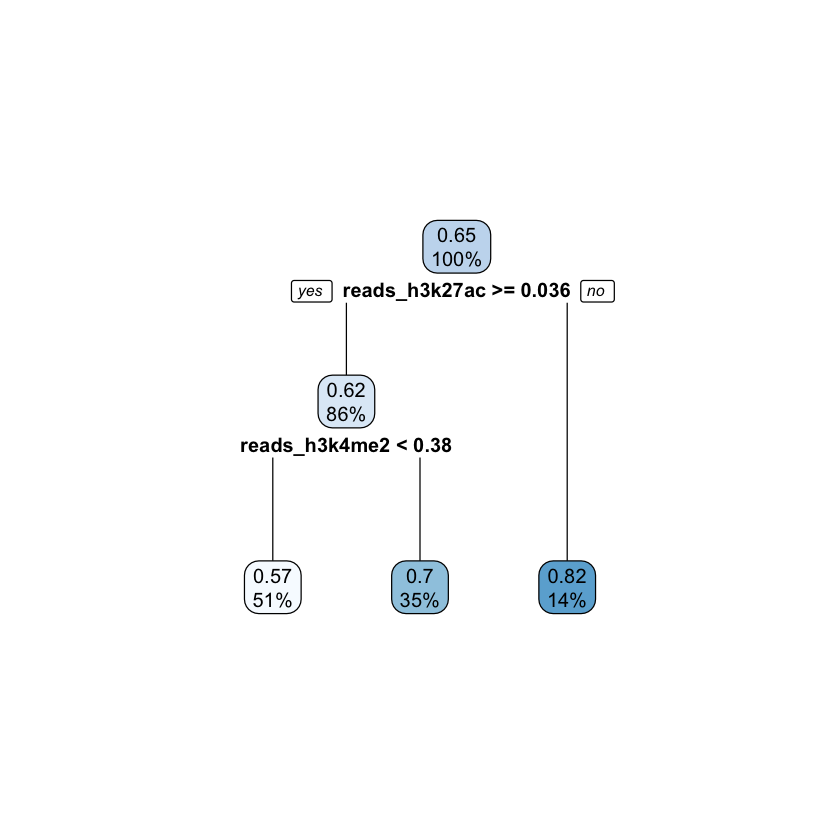

In [16]:
rpart.plot(ep_tree1)

In [17]:
tree_pred2 <- predict(ep_tree1,test)
head(tree_pred2)

2        15        16        19        28        37 
0.8193842 0.8193842 0.8193842 0.8193842 0.8193842 0.8193842

An important point to consider is that the enhancers outnumber non-enhancers by a near-10 fold margin in the current dataset (as depicted below). This engenders a natural bias.

In [18]:
table(epdata$class)


     0      1 
394953 740273 

There is a complete contrast between the two trees drawn from *ctree()* and *rpart()* functions. The *ctree* uses a significance test procedure in order to select variables instead of selecting the variable that maximizes an information measure (e.g. Gini coefficient). Basically the methodology of both approaches is different; *rpart* is a CART algorithm, while *party* is a CHAID algorithm. (http://www.bzst.com/2006/10/classification-trees-cart-vs-chaid.html).

Next, we move to the more fuller concept, of Random Forests.

# Random Forests

Decision trees are accomodated inside Random Forests. This ensemble brings about variety in data classification and hence more robustness. This notion also helps in avoidance of overfitting. Random forests can deal with large number of features and selects them for constructing trees on the basis of importance. As we will see, they are easy to implement and have two free parameters to tune- (i) *ntree* signifying the number of trees (where default value is 500), and (ii) *mtry* denoting variables randomly selected for each split (default here sq(p) when classification is sought, and (p/3) when regression; p is the total number of features in the dataset) 

## Package Installation and Loading (randomForest)

In [19]:
install.packages("randomForest", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
install.packages("caret", dependencies = TRUE, repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
library(randomForest)
library(caret)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




There are basically three steps involved in construction of a Random Forest:
    1. Draw *ntree* bootstrap samples.
    2. For each bootstrap sample, grow a un-pruned tree by choosing best split based on a random sample of *mtry* predictors at each node.
    3. Predict new daat using majority votes for classification, and average for regression based on *ntree* trees.

For application, we shall consider a subset of the data we used for decision trees. The random forests algorithm tend to consume greater in terms of computational resources.

In [20]:
## Let us work with a fraction of data.

set.seed(108)

epdata_sample <- epdata[sample(nrow(epdata), replace=F, size=0.01*nrow(epdata)),]
rownames(epdata_sample) <- c()
epdata_sample$class <- as.numeric(as.factor(epdata_sample$class))-1

## Data partitioning

set.seed(5)
data_partition <- sample(2, nrow(epdata_sample), replace = TRUE, prob = c(0.7,0.3))
train_sample <- epdata_sample[data_partition==1,]
test_sample <- epdata_sample[data_partition==2,]

In [21]:
# Execute random forest algorithm
rf1 <- randomForest(formula= class ~ reads_h3k27ac + reads_h3k4me3 + reads_h3k4me2 + reads_h3k4me1, 
                    data= train_sample,
                   proximity = TRUE,
                   ntree=500)
print(rf1)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = class ~ reads_h3k27ac + reads_h3k4me3 +      reads_h3k4me2 + reads_h3k4me1, data = train_sample, proximity = TRUE,      ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.2173132
                    % Var explained: 3.1


In [22]:
# Prediction and Confusion Matrix
p1<- predict(rf1,train_sample)
head(ifelse(p1>0.5, "Non-Enhancer", "Enhancer"))
p1 <- ifelse(p1>0.5, "1", "0")
confusionMatrix(as.factor(p1),as.factor(train_sample$class))

1              2              4              5              7 
"Non-Enhancer" "Non-Enhancer" "Non-Enhancer" "Non-Enhancer" "Non-Enhancer" 
            10 
"Non-Enhancer"

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  705   98
         1 1986 5136
                                          
               Accuracy : 0.737           
                 95% CI : (0.7272, 0.7467)
    No Information Rate : 0.6604          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2932          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.26198         
            Specificity : 0.98128         
         Pos Pred Value : 0.87796         
         Neg Pred Value : 0.72115         
             Prevalence : 0.33956         
         Detection Rate : 0.08896         
   Detection Prevalence : 0.10132         
      Balanced Accuracy : 0.62163         
                                          
       'Positive' Class : 0               
                        

In [23]:
p2<- predict(rf1,test_sample)
head(ifelse(p2>0.5, "Non-Enhancer", "Enhancer"))
p2 <- ifelse(p2>0.5, "1", "0")
confusionMatrix(as.factor(p2),as.factor(test_sample$class))

3              6              8              9             18 
"Non-Enhancer" "Non-Enhancer" "Non-Enhancer" "Non-Enhancer" "Non-Enhancer" 
            20 
"Non-Enhancer"

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0   90  111
         1 1104 2122
                                          
               Accuracy : 0.6455          
                 95% CI : (0.6292, 0.6615)
    No Information Rate : 0.6516          
    P-Value [Acc > NIR] : 0.7798          
                                          
                  Kappa : 0.0318          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.07538         
            Specificity : 0.95029         
         Pos Pred Value : 0.44776         
         Neg Pred Value : 0.65778         
             Prevalence : 0.34841         
         Detection Rate : 0.02626         
   Detection Prevalence : 0.05865         
      Balanced Accuracy : 0.51283         
                                          
       'Positive' Class : 0               
                        

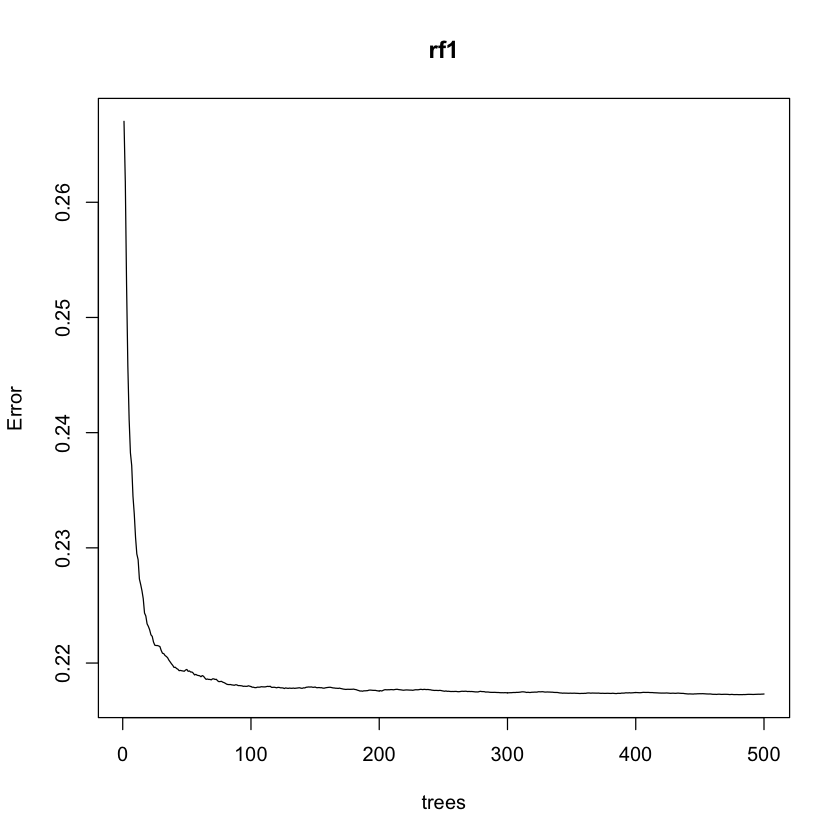

In [24]:
# Error rate of the Random Forest
plot(rf1)

The above plot shows that the error rate stablises after ~100 trees and any number of trees beyond doesn't bring any betterment to the error. In view of the same, we shall tune the paramaters of our forest to reduce the number of trees from 500 (default) to 100. Let us observe the change in results. This step helps ascertain an optimal value for *ntree*. 

Warning message in randomForest.default(x, y, mtry = mtryStart, ntree = ntreeTry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


mtry = 1  OOB error = 0.2188429 
Searching left ...
Searching right ...


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


mtry = 2 	OOB error = 0.2327512 
-0.06355357 0.005 


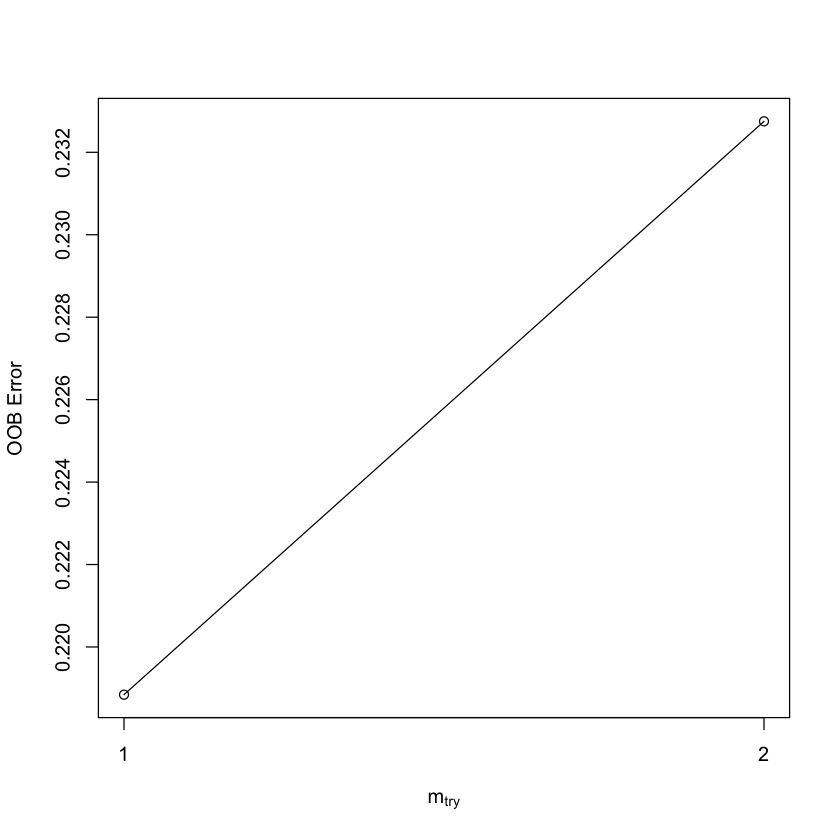

In [25]:
# Tuning mtry

t <- tuneRF(train_sample[,-5], train_sample[,5],
            stepFactor =2,
            plot = TRUE,
            ntreeTry = 100,
            trace = TRUE,
            improve = 0.005)               

#### Exercise
- Do any new values of *mtry* emerge on changing *stepfactor* parameter?

Warning message in randomForest.default(x, y, mtry = mtryStart, ntree = ntreeTry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


mtry = 1  OOB error = 0.2180854 
Searching left ...
Searching right ...


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


mtry = 4 	OOB error = 0.2452999 
-0.124788 0.005 


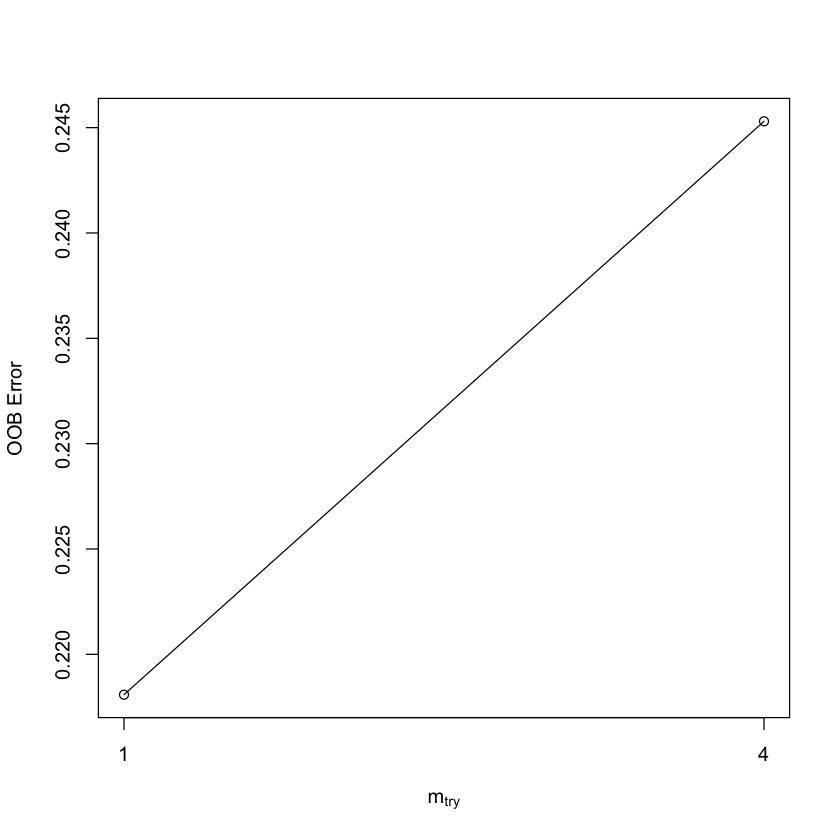

In [26]:
# Tuning with stepfactor=5

t1 <- tuneRF(train_sample[,-5], train_sample[,5],
            stepFactor =5,
            plot = TRUE,
            ntreeTry = 100,
            trace = TRUE,
            improve = 0.005)

Warning message in randomForest.default(x, y, mtry = mtryStart, ntree = ntreeTry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


mtry = 1  OOB error = 0.2182064 
Searching left ...
Searching right ...


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”


mtry = 4 	OOB error = 0.2460457 
-0.1275822 0.005 


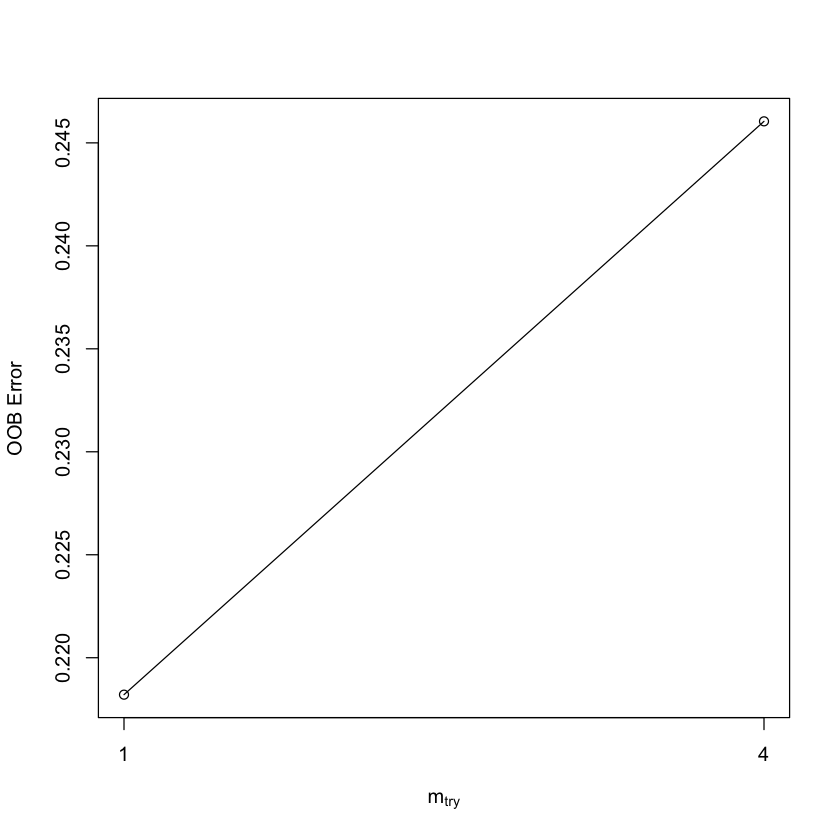

In [27]:
# Tuning with stepfactor=4

t1 <- tuneRF(train_sample[,-5], train_sample[,5],
            stepFactor =4,
            plot = TRUE,
            ntreeTry = 100,
            trace = TRUE,
            improve = 0.005)

Thus, we see that with stepfactor=5,4 no new values of mtry emerge. To further explore, we can try with other examples too. 

We observe that OOB error stablises on assuming the random sample size of 1. This is the optimal value for *mtry* parameter. With the modified values of *mtry* and *ntee*, let us attempt our new Random Forest model. It will hopefully be an improved one.

In [28]:
rf2 <- randomForest(class~.,
                    data = train_sample,
                    ntree=100,
                    mtry=1,
                    importance= TRUE,
                    proximity = TRUE)
print(rf2)     

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = class ~ ., data = train_sample, ntree = 100,      mtry = 1, importance = TRUE, proximity = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 0.2186588
                    % Var explained: 2.5


In [29]:
rf2 <- randomForest(class~.,
                    data = test_sample,
                    ntree=100,
                    mtry=1,
                    importance= TRUE,
                    proximity = TRUE)
print(rf2)  

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”



Call:
 randomForest(formula = class ~ ., data = test_sample, ntree = 100,      mtry = 1, importance = TRUE, proximity = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 0.2259723
                    % Var explained: 0.46


In [30]:
p3<- predict(rf2,test_sample)
head(ifelse(p3>0.5, "Non-Enhancer", "Enhancer"))
p3 <- ifelse(p3>0.5, "1", "0")
confusionMatrix(as.factor(p3),as.factor(test_sample$class))

3              6              8              9             18 
"Non-Enhancer" "Non-Enhancer"     "Enhancer"     "Enhancer" "Non-Enhancer" 
            20 
"Non-Enhancer"

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  466   57
         1  728 2176
                                          
               Accuracy : 0.7709          
                 95% CI : (0.7565, 0.7849)
    No Information Rate : 0.6516          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4196          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.3903          
            Specificity : 0.9745          
         Pos Pred Value : 0.8910          
         Neg Pred Value : 0.7493          
             Prevalence : 0.3484          
         Detection Rate : 0.1360          
   Detection Prevalence : 0.1526          
      Balanced Accuracy : 0.6824          
                                          
       'Positive' Class : 0               
                        

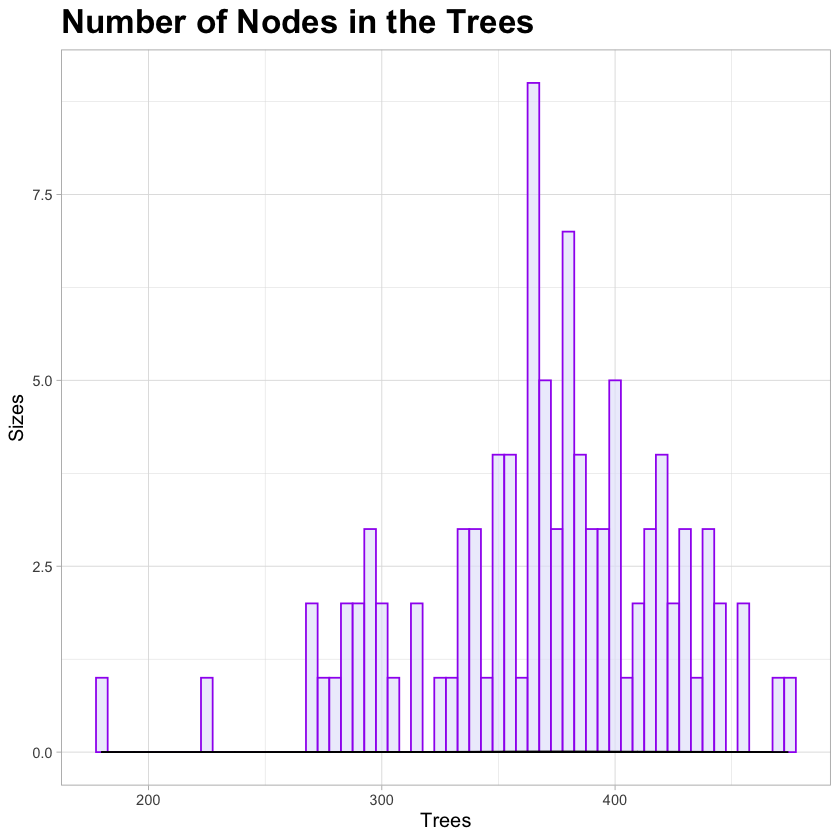

In [31]:
# Number of nodes for the trees
library(ggplot2)
ts <- as.data.frame(treesize(rf2), row.names = c())
ggplot(data = ts, aes(x = `treesize(rf2)`)) + 
  geom_histogram(binwidth = 5, color="purple", fill="lavender", position="identity", alpha=0.7)+
  labs(x="Trees", y="Sizes")+
  ggtitle("Number of Nodes in the Trees")+
  geom_density(alpha=0.6)+
  theme_light()+
  theme(plot.title= element_text(size = 20, face = "bold"),
        axis.title = element_text(size = 12))

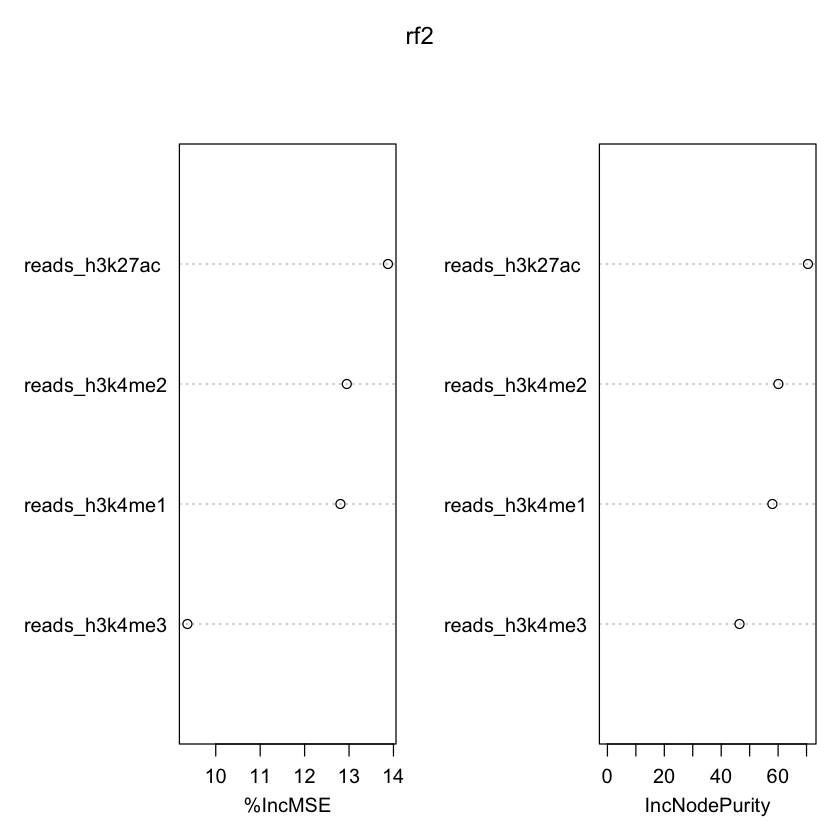

In [32]:
# Variable Importance

varImpPlot(rf2)

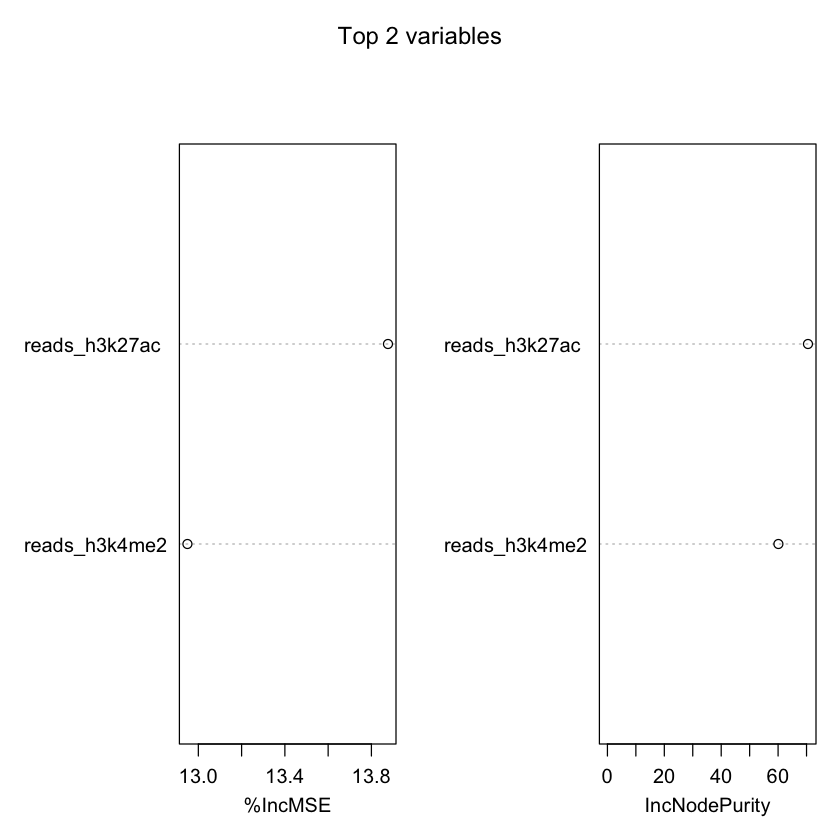

In [33]:
varImpPlot(rf2, sort = TRUE, n.var = 2, main = "Top 2 variables")

In [34]:
importance(rf2)

,%IncMSE,IncNodePurity
reads_h3k27ac,13.876614,70.50837
reads_h3k4me1,12.806248,57.99973
reads_h3k4me2,12.949535,60.10583
reads_h3k4me3,9.362545,46.43998


In [35]:
varUsed(rf2)

[1] 9781 9189 9360 8440

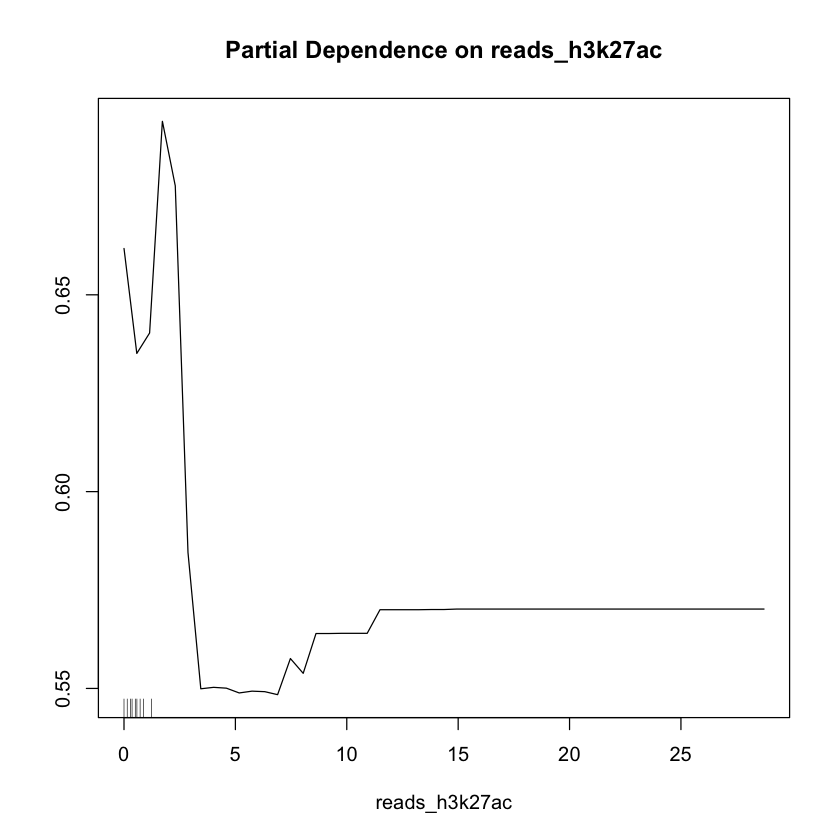

In [36]:
# Partial Dependence Plots

partialPlot(rf2, train_sample, reads_h3k27ac , "Enhancer")

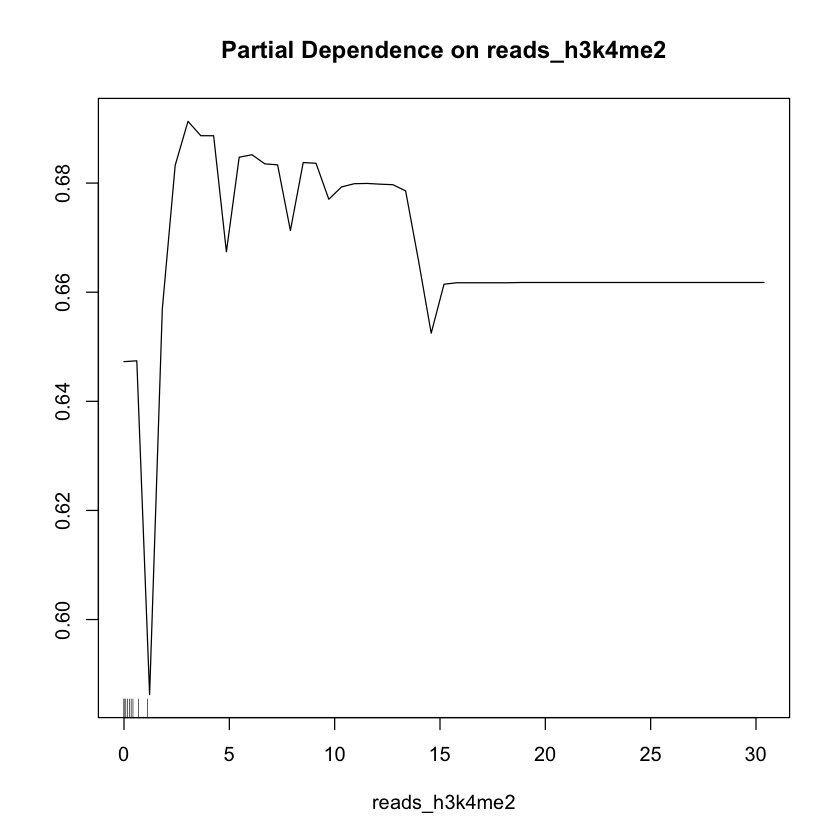

In [37]:
partialPlot(rf2, train_sample, reads_h3k4me2, "Non-Enhancer")

The partial dependence plot represents a variable's contribution to the probability of class depiction (classification).

#### Exercise
- Try the partial dependence plots for "reads_h3k4me3" variable.

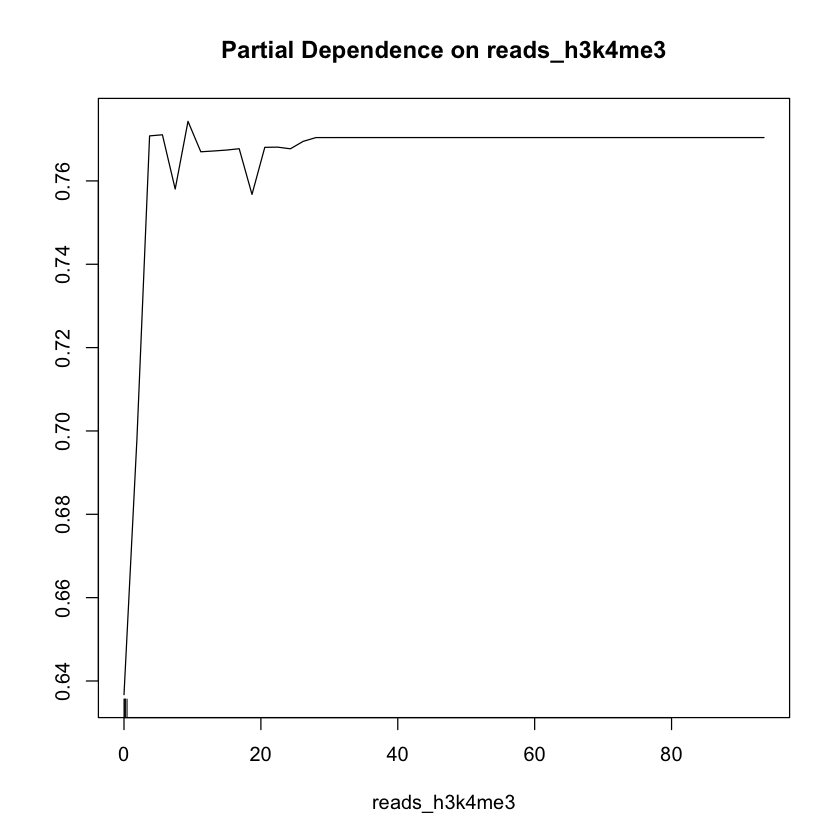

In [38]:
partialPlot(rf2, train_sample, reads_h3k4me3, "Non-Enhancer")

The variable contribution of H3K4me3 is pretty sluggish and imprecise.

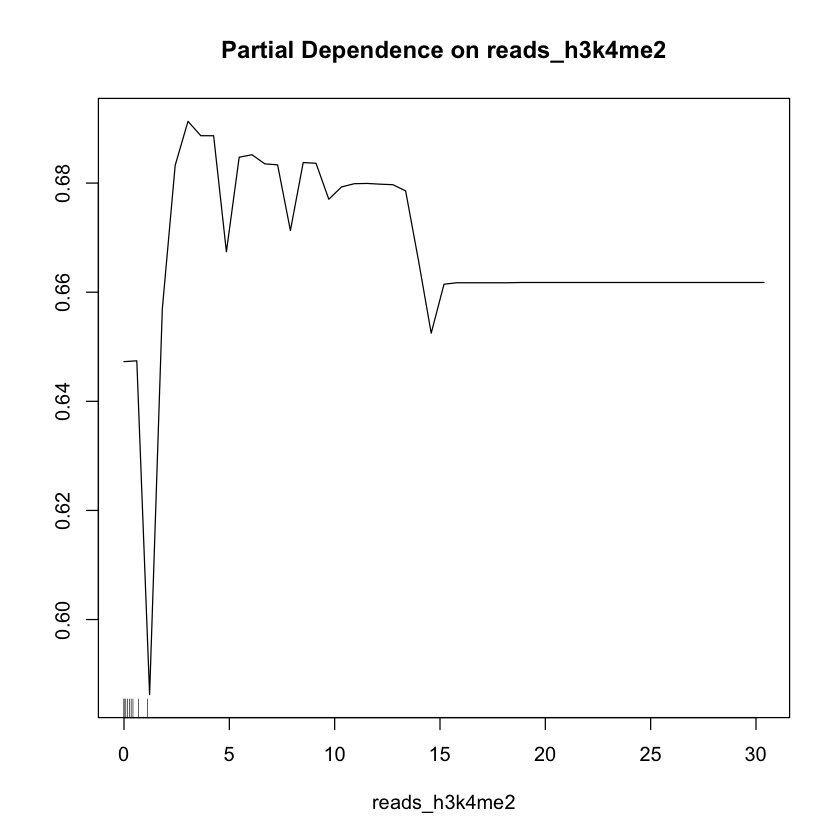

In [39]:
partialPlot(rf2, train_sample, reads_h3k4me2, "Enhancer")

In [40]:
# Extract Single tree
getTree(rf2, k=1)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,1,0.03618215,-3,0.6545083
2,0,0,0,0.00000000,-1,0.8155340
3,4,5,2,0.50242515,-3,0.6260302
4,6,7,3,0.29784278,-3,0.5724551
5,8,9,4,2.50465408,-3,0.6980676
6,10,11,4,0.27829490,-3,0.5434028
7,12,13,2,0.39077512,-3,0.6370656
8,14,15,2,2.73542582,-3,0.6851064
9,16,17,4,19.12283515,-3,0.9253731
10,18,19,1,0.90455373,-3,0.5221328


#### Exercise
- The above example elaborates the definition for the first tree. Try different values of *k* for visualizing other trees in the forest.

In [41]:
## Fifth tree
getTree(rf2, k=5)

,left daughter,right daughter,split var,split point,status,prediction
1,2,3,4,0.27829490,-3,0.6483805
2,4,5,1,0.03618215,-3,0.6294678
3,6,7,2,1.39562542,-3,0.7007701
4,8,9,4,0.03975641,-3,0.8087649
5,10,11,4,0.11926924,-3,0.5848214
6,12,13,4,0.51683338,-3,0.6631737
7,14,15,3,4.51019073,-3,0.8049793
8,16,17,2,0.05582502,-3,0.8228942
9,18,19,2,0.39077512,-3,0.6410256
10,20,21,4,0.03975641,-3,0.5259179


Warning message in RColorBrewer::brewer.pal(nlevs, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


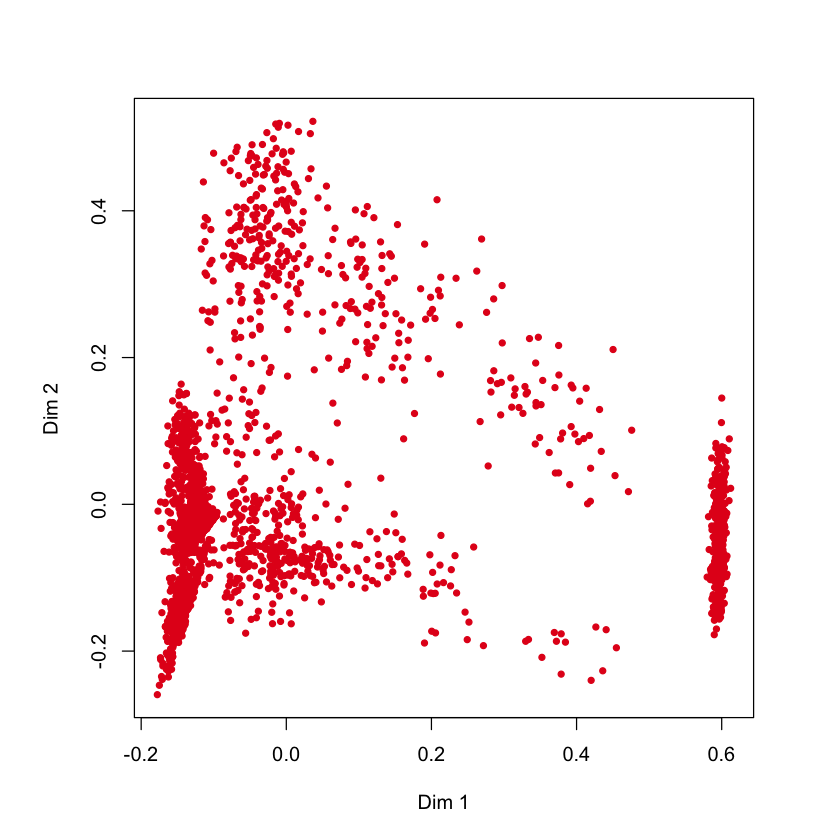

In [42]:
# Multidimensional Scaling (MDS) plot of proximity matrix.

MDSplot(rf2, train_sample$class)

# Notes

  1.  The authors [@Rajagopal2013] construed p300 (a transcription co-activator) binding sites overlapping DNase-I hypersentitive sites and distal to annotated transcription start sites (TSS) as active p300 binding sites representative of enhancers.
  2. Clusters with presence or absence of H3K36me3 were hypothesized to represent genic and inter-genic enhancers respectively.
  3. While pre-processing the genomic ranges data if you need to convert WIG file to BED file, you may want to refer to BEDOPS -> wig2bed() function. This is available as a command line utility.

P.S. During intermediary partitioning, if the node has the lowest Gini Index, it becomes leaf node. That will most likely be the case when all remaining non-root nodes have been exhausted, checking for impurity score.

All workshop study material is available at my github page (https://github.com/shauryajauhari).


The excercises are embedded in the body of the text itself. Please look for the same.